# `dragon_scales`

Start at the max pixel value in image and group the ungrouped pixels within input radius. Goto the next highest pixel value not already included in a group and repeat. The radius can be a fixed value used for all pixels or taken from input image.

In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Fri Jan 25 10:37:43 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example 1, fixed radius

Locate max pixel, draw a 10 pixel circle around it.  Goto the next max pixel, and draw a cirlce around it excluding any pixels already grouped.  Repeat.

In [4]:
dragon_scales smimg.fits rad=10 outfile=ds_10px.map \
  binimg=ds_10px.img shape=circle clobber=yes

In [5]:
### map2reg ds_10px.map ds_10px.reg

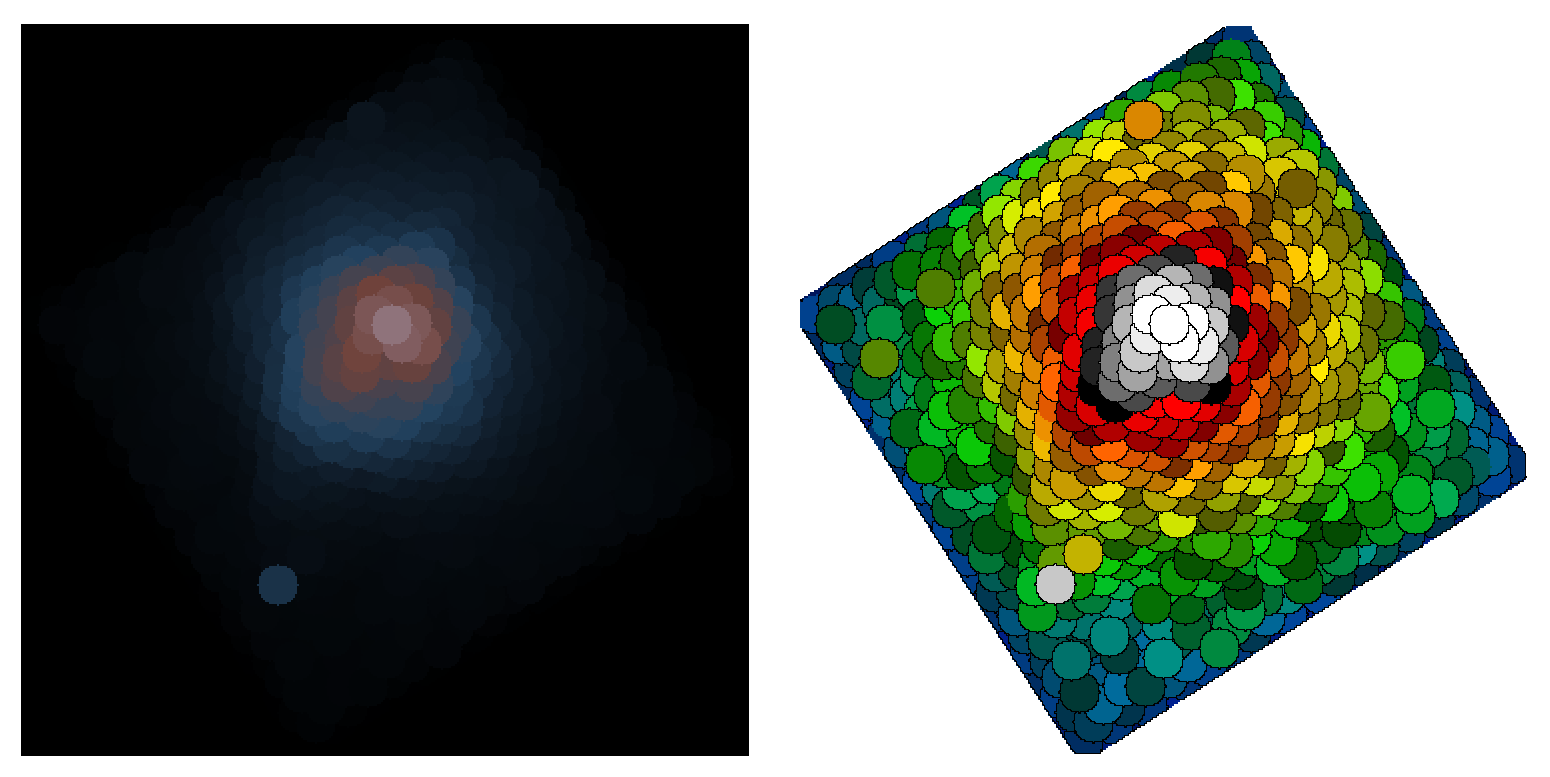

In [6]:
display_map ds_10px.img ds_10px.map ds_10px.png ds_10px.reg


Users will find many small groups filling in the gaps between larger ones.  This can be adjusted later
using the `merge_too_small` scripts (below)



## Example 2, variable radius

In this example we create an input radius map.  The radius map is create such that a circle at
each pixel with a radius equal to the pixel value will contain at least 500 counts, with a 
maximum radius of 100 pixels.

This radius map is then input to `dragon_scales`

In [7]:
dragon_scales smimg.fits min500.map out=ds_500cts.map  \
  binimg=ds_500cts.img clob+

In [8]:
### map2reg ds_500cts.map ds_500cts.reg clob+

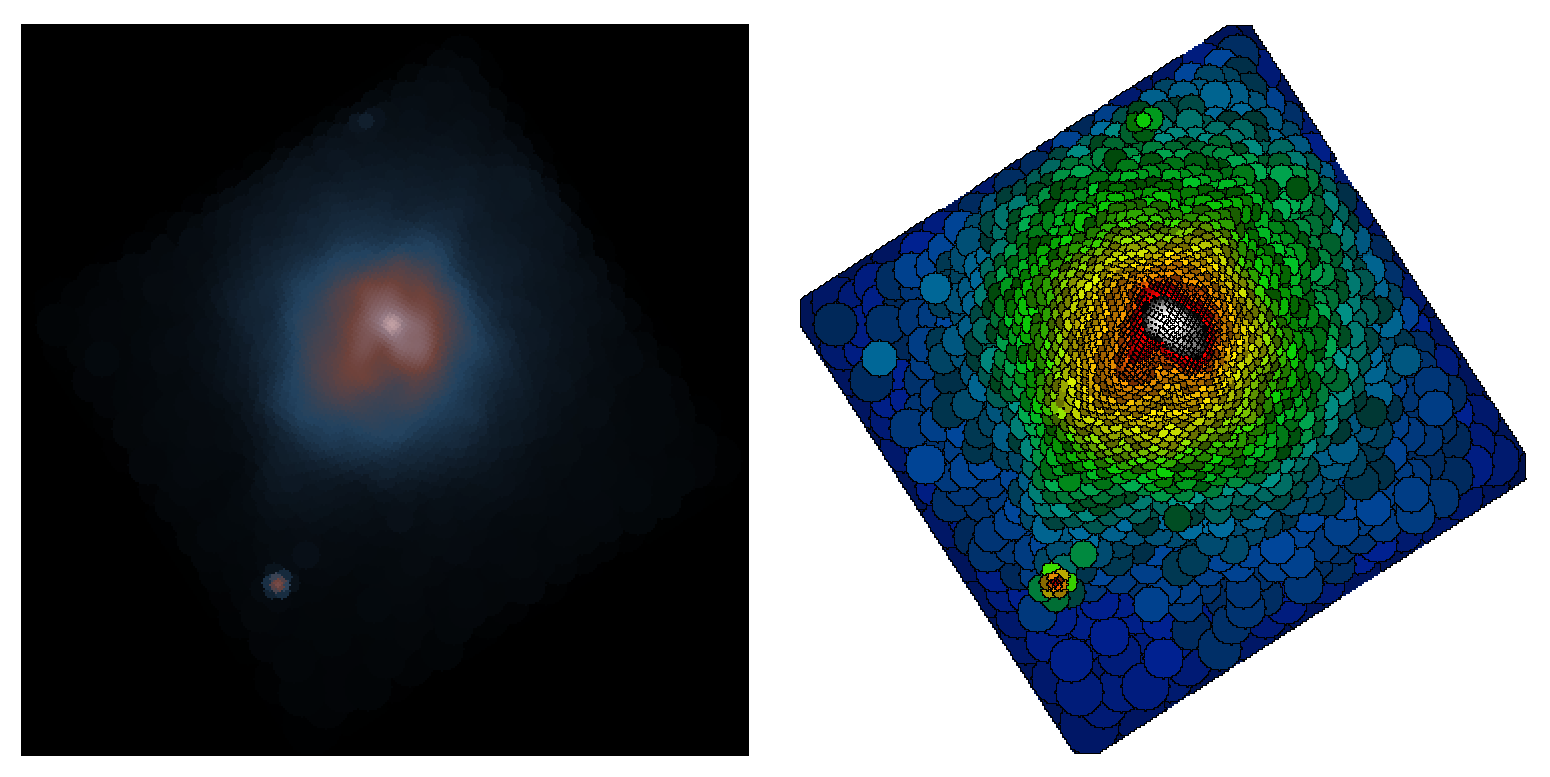

In [9]:
display_map ds_500cts.img ds_500cts.map ds_500cts.png ds_500cts.reg

The same effects are seen in the variable radius compared to the fixed radius input.

Note: in the case of the radius map input, the smoothing is not guaranteed to contain at least 500 counts when smoothing since the groups are not allowed to overlap.

This algorithm does not require that the input image be smoothed.


## Example 3 squares

In [10]:
dragon_scales smimg.fits rad=10 outfile=ds_10px_sqr.map \
  binimg=ds_10px_sqr.img shape=box clobber=yes
  

In [11]:
### map2reg ds_10px_sqr.map ds_10px_sqr.reg

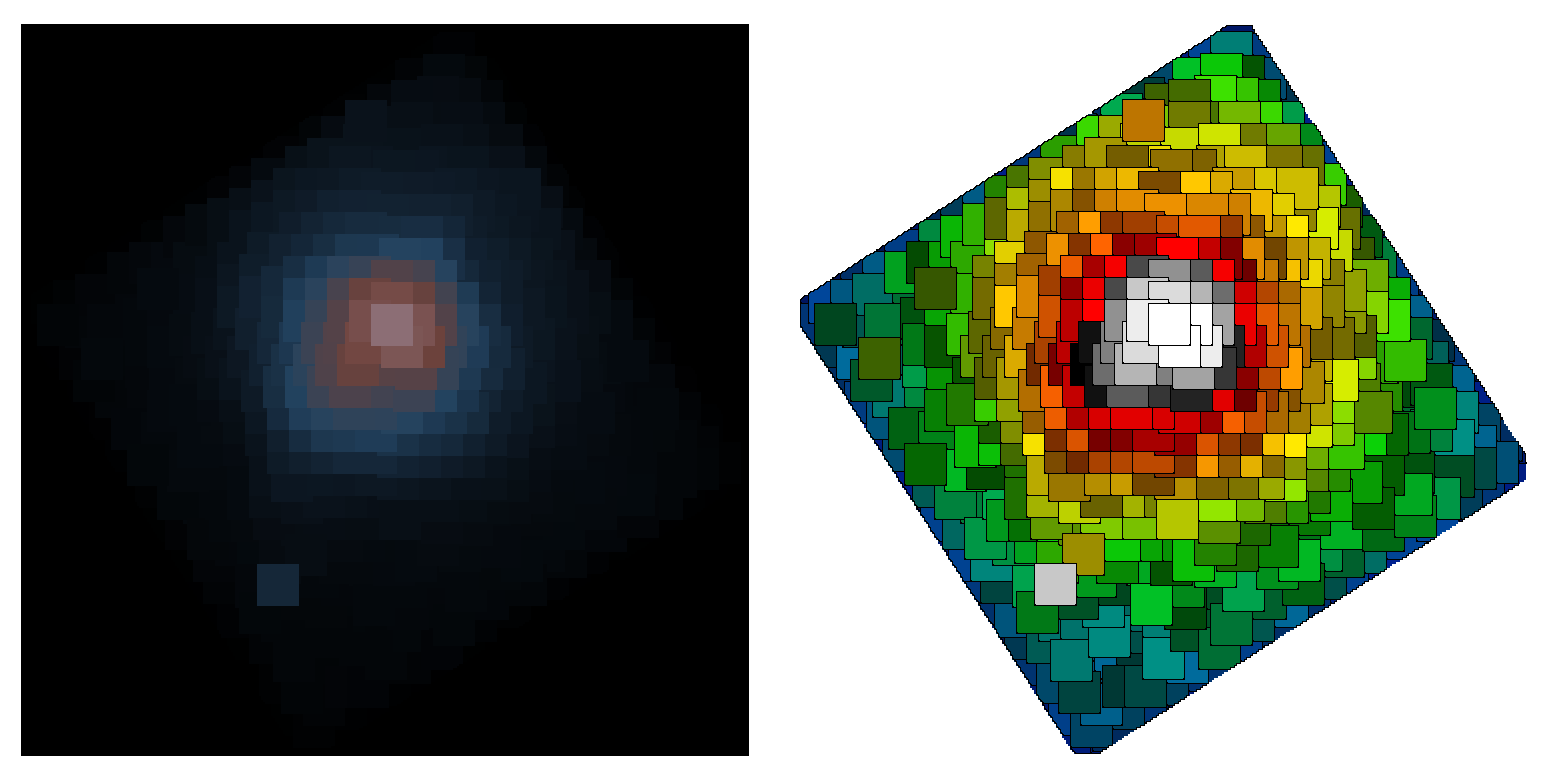

In [12]:
display_map ds_10px_sqr.img ds_10px_sqr.map ds_10px_sqr.png ds_10px_sqr.reg
